 # Machine Learning models for predicting risk scores of having NCDs(Heart & Diabetes)

---


**<h3>Activities</h3>**
<ol type="1">
    <li>Data collection, loading </li>
    <li>Pre-Processing
    <ul>
           <li>Data cleaning</li>
           <li>Understanding the variables </li>
            <li> Checking nan values  </li>
            <li> detecting outliers </li>
            <li> checking duplicates </li>
         </ul>
    </li>
     <li>Exploratory Data Analysis </li>
     <li>Label Encoding </li>
      <li>Feature Engineering  </li>
    <li>Build ML models using percentage split
         <ul>
            <li> Random Forest  </li>
            <li> Support Vector Machine </li>
            <li> Artificial Neural Networks  </li>    
         </ul>
    </li>
    <li>Model Predictions  </li>
    <li>Model Evaluation </li>
    <li>Communicating the insights </li>
</ol>

# Importing libraries

In [ ]:
# for data loading, assembly, manipulation, and exploration.
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for statistical models
import statsmodels.api as sm

# for model training and testing
from sklearn.model_selection import train_test_split

# for model selection and fitting
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

# for performance metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder, StandardScaler

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Heart Disease

# 1. Data collection and loading

In [ ]:
heart_data = pd.read_csv("Heart_Disease.csv")
heart_data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
heart_data.sample(20)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
241,39,1,3,140,321,0,2,182,0,0.0,1,0,3,Absence
161,62,0,4,150,244,0,0,154,1,1.4,2,0,3,Presence
235,62,0,4,160,164,0,2,145,0,6.2,3,3,7,Presence
135,46,0,3,142,177,0,2,160,1,1.4,3,0,3,Absence
257,55,1,4,132,353,0,0,132,1,1.2,2,1,7,Presence
99,50,0,2,120,244,0,0,162,0,1.1,1,0,3,Absence
103,57,1,4,165,289,1,2,124,0,1.0,2,3,7,Presence
224,35,0,4,138,183,0,0,182,0,1.4,1,0,3,Absence
34,50,1,4,144,200,0,2,126,1,0.9,2,0,7,Presence
12,44,1,3,140,235,0,2,180,0,0.0,1,0,3,Absence


# 2. Pre-Processing

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

## Checking null values

In [ ]:
heart_data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

The heart dataset has no missing values

In [ ]:
# check for duplicates
heart_data.duplicated().sum()

0

The dataset has no duplicates

In [ ]:
# analyzing the target variable
heart_data['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [ ]:
# understanding the columns
heart_data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
# understanding the data numerically (summary statistics)
heart_data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


From the above statistics, we can note the following:
- Cholesterol holds a high frequency in the data, with the max 564 and the minimum of 126 and a highest mean


# 3. Exploratory Data Analysis

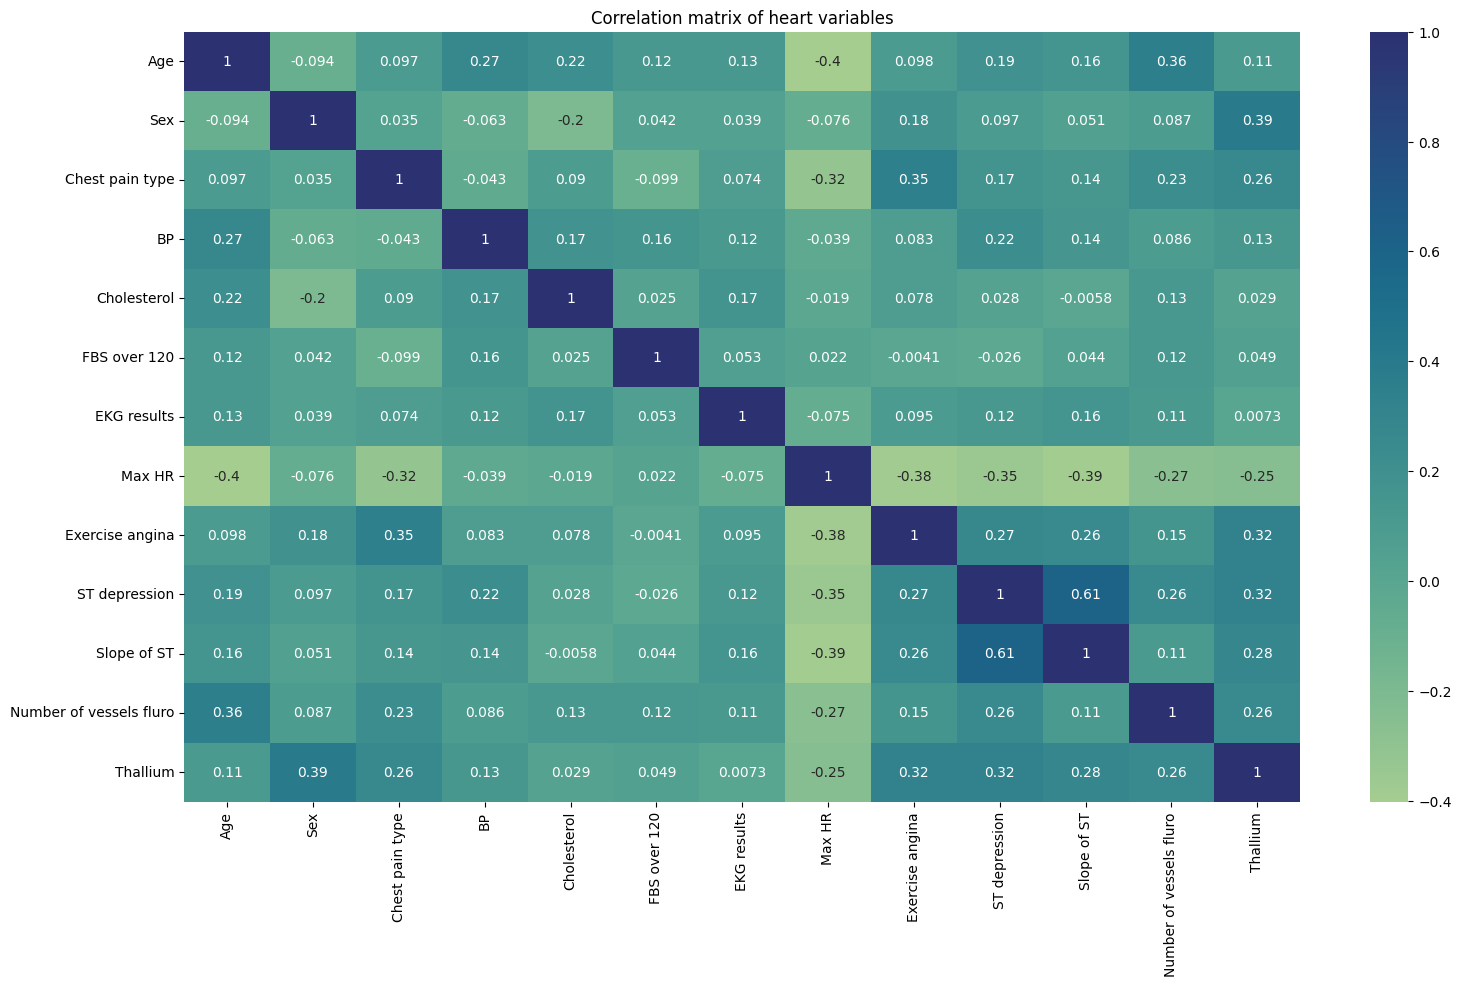

In [ ]:
# correlation matrix of the weather variables
corr_m = heart_data.corr()
# corr_m
# ploting the heatmap for the correlation
plt.figure(figsize=(18,10))          # Adjusting the plot size
sns.heatmap(corr_m,cmap='crest', annot=True)

plt.title("Correlation matrix of heart variables")
plt.show()

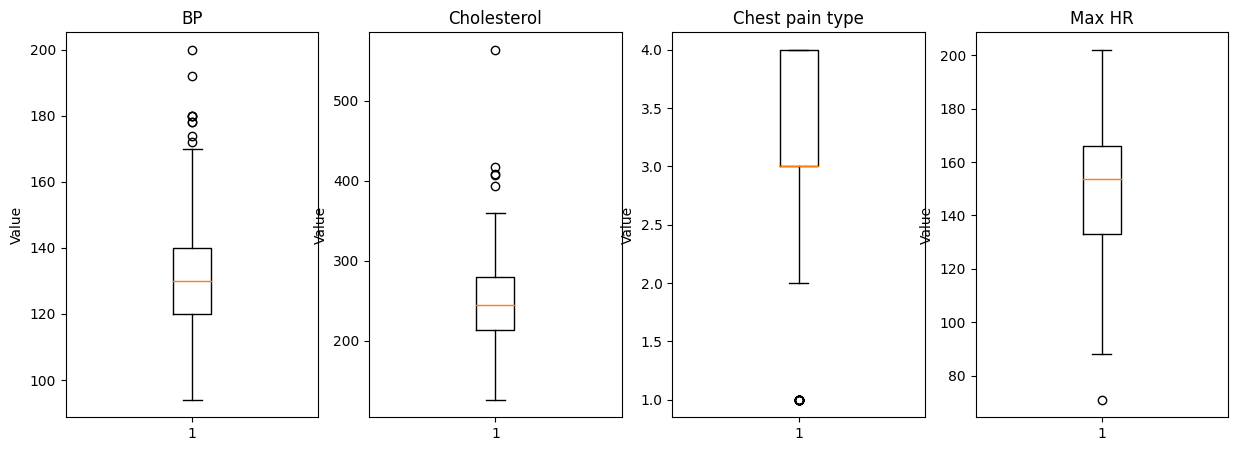

In [ ]:
# Univariate analysis: Create box plots to identify the presence of any outliers

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, col in enumerate(['BP','Cholesterol','Chest pain type','Max HR']):
    axs[i].boxplot(heart_data[col])
    axs[i].set_title(col)
    axs[i].set_ylabel('Value')


plt.show()

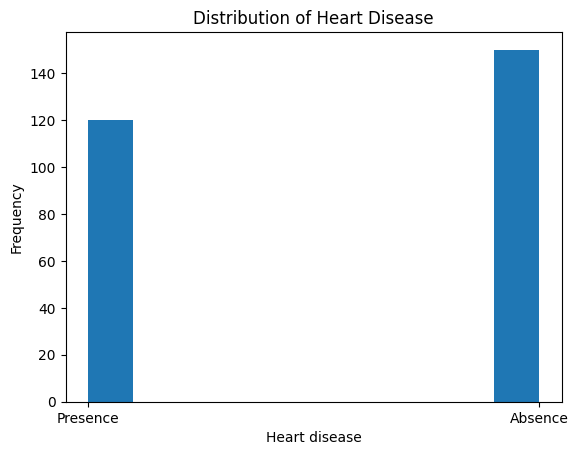

In [ ]:
# getting the frequency of each class
target_column = heart_data['Heart Disease'].value_counts()
# print(appliance_column)

# ploting the frequency of appliances
plt.hist(heart_data['Heart Disease'])
plt.xlabel('Heart disease')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Disease')
plt.show()


In [ ]:
heart_data['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

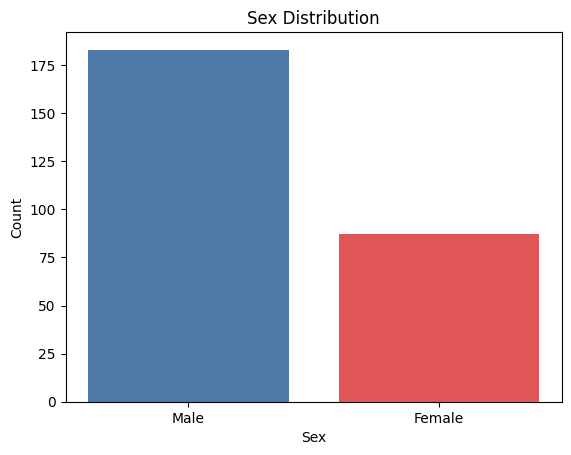

In [ ]:
# plotting the distribution of the sex
sex_counts = heart_data['Sex'].value_counts()
male_count = sex_counts[1]
female_count = sex_counts[0]

labels = ['Male', 'Female']
values = [male_count, female_count]

plt.bar(labels, values,color=['#4e79a7', '#e15759'])
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Heart Disease  Absence  Presence
Sex                             
0                   67        20
1                   83       100


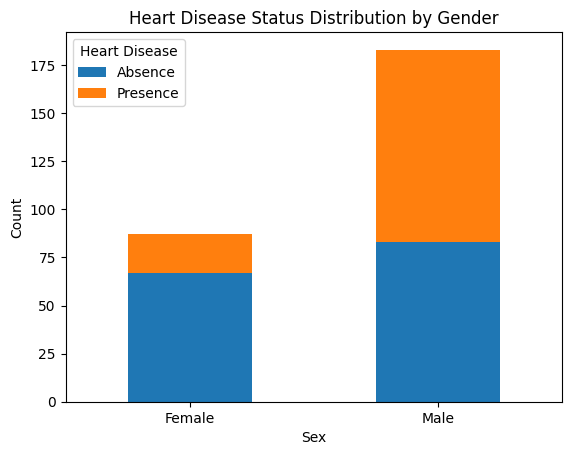

In [ ]:
# group the data by sex and status, and count the number of occurrences
grouped = heart_data.groupby(['Sex', 'Heart Disease'])['Heart Disease'].count().unstack()
print(grouped)

# plot a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True)
ax.set_xticklabels(['Female', 'Male'], rotation=0)
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Heart Disease Status Distribution by Gender')
plt.show()

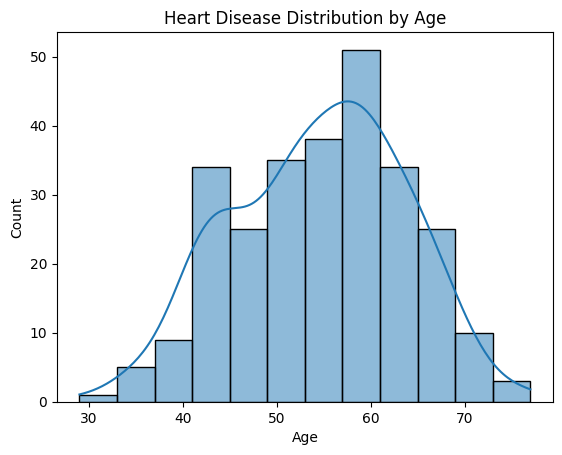

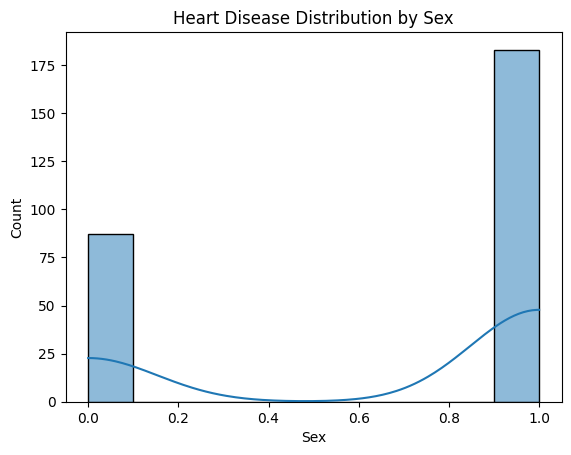

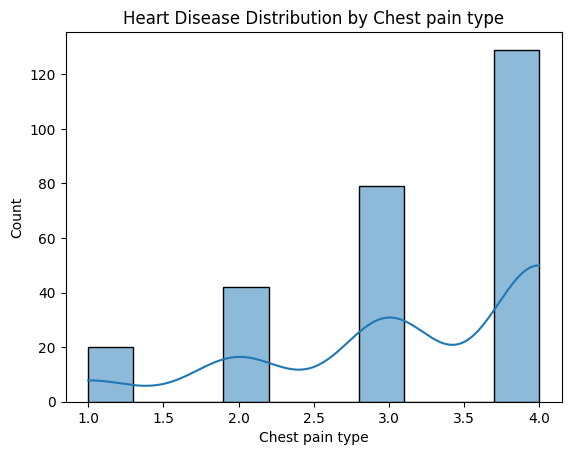

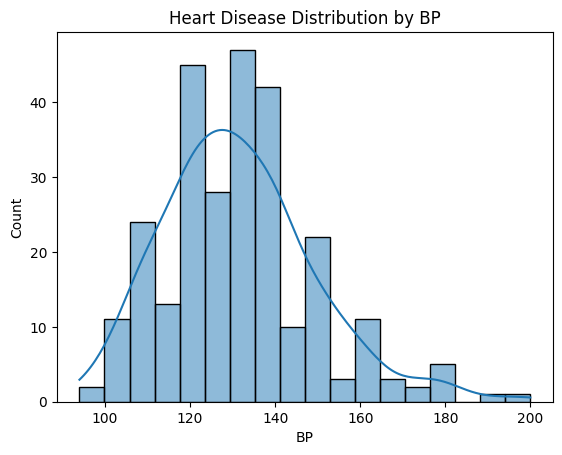

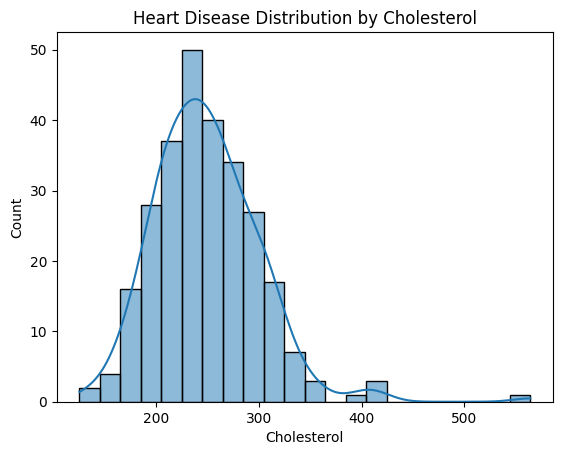

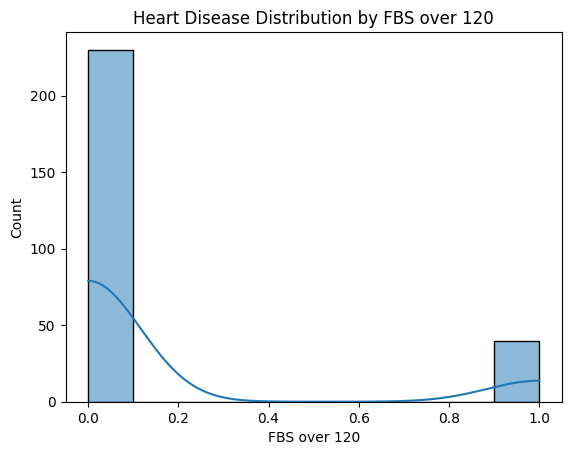

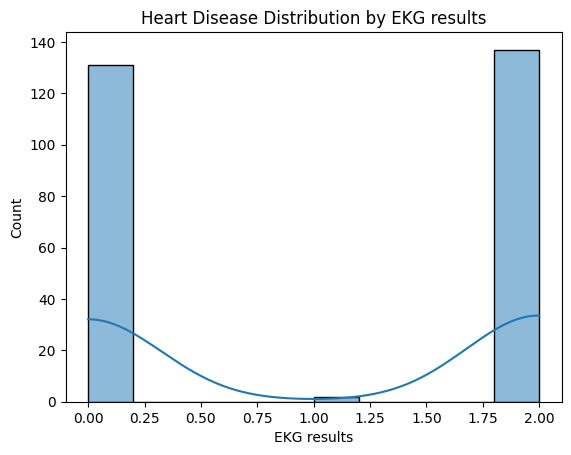

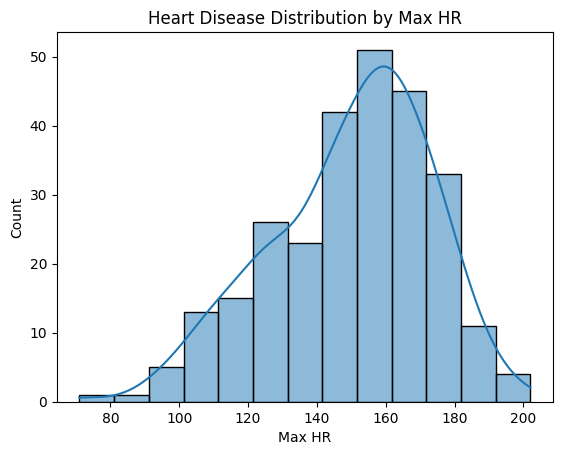

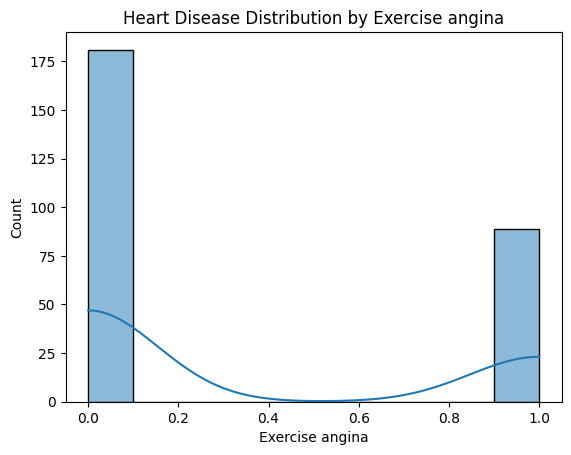

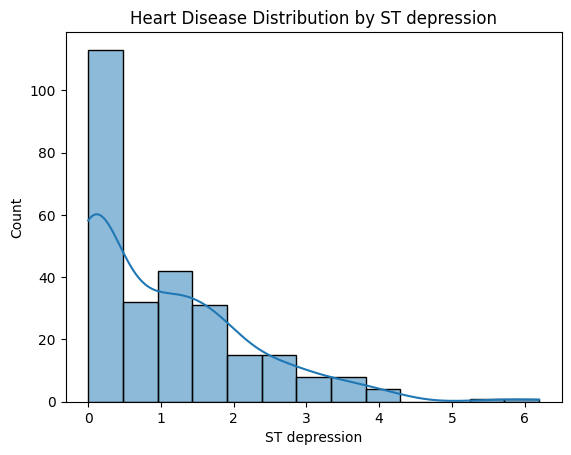

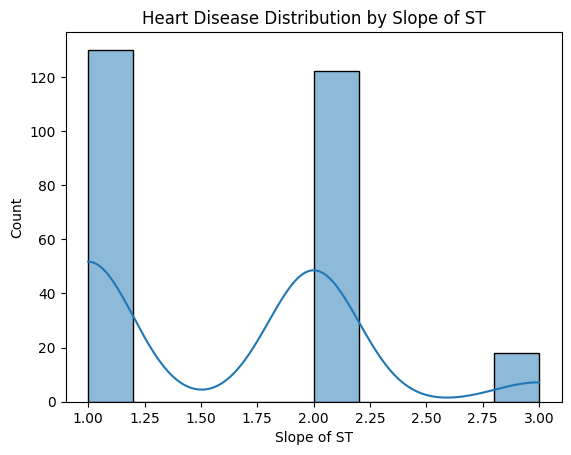

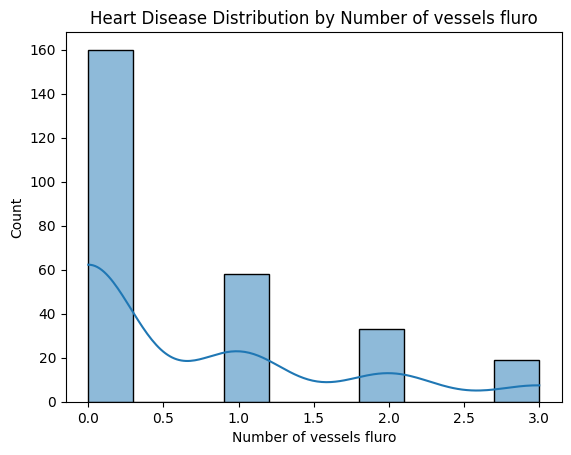

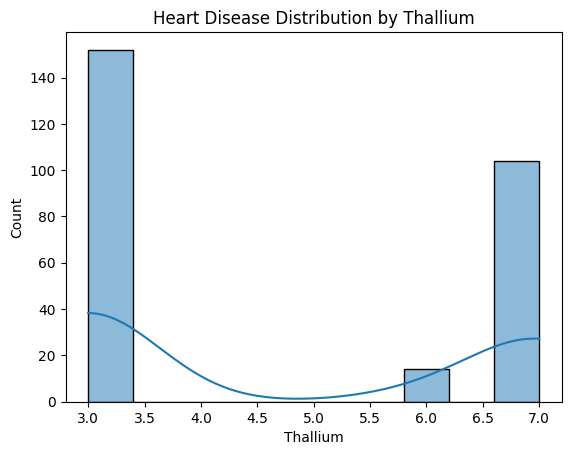

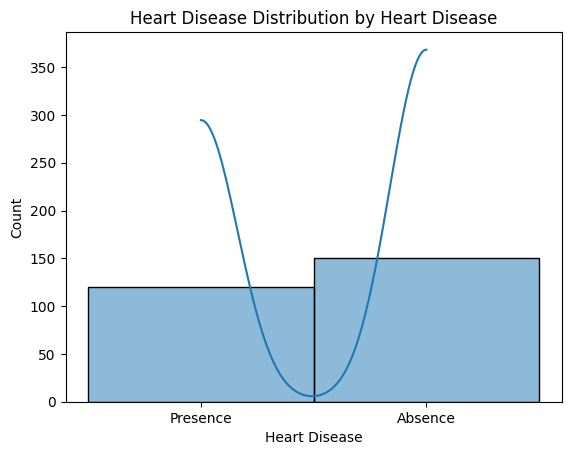

In [ ]:
# Create distribution plots for all variables using histogram
for column in heart_data:
    sns.histplot(data=heart_data, x=column, kde=True)
    plt.title("Heart Disease Distribution by "+column)
    plt.show()

# 4. Label Encoding

In [ ]:
# Encode categorical label (Heart Disease)
status_encoder = LabelEncoder()
heart_data['Heart Disease'] = status_encoder.fit_transform(heart_data['Heart Disease'])

In [ ]:
heart_data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


# 5. Feature engineering -- Feature selction

Feature selection is done to avoid overfitting by removing unnecessary features for prediction.

it is done by using stepwise regression -- Forward selection

The forward selection will start with an empty set of variables, then add one variable at time at a time until a certain criterion is met basing on the most significant using the statistical significance.  In this case it will select features based on the feature that has the best pvalue less than 0.05 threshold. The selected features will further be used for fitting a linear regression model.

In [ ]:
#forward regression method from https://github.com/AakkashVijayakumar/stepwise-regression/blob/master/stepwise_regression/step_reg.py
# define the dependent and independent axis
x =  heart_data.iloc[:,:-1]
y = heart_data['Heart Disease']

selected_features=[]

# forward selection
def forward_regression(X, y, verbose=False):

    top_variable = []               # keeps the most significant variables

    while True:
        changed=False
        least_significant = list(set(X.columns)-set(top_variable))      # the least significant variables
        new_pvalue = pd.Series(index=least_significant)
        for values in least_significant:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[top_variable+[values]]))).fit()
            new_pvalue[values] = model.pvalues[values]
        best_pvalue = new_pvalue.min()
        if best_pvalue < 0.05:                 # the best pvalue is the pvalue with less than 0.05 threshold
            best_variable = new_pvalue.idxmin()
            top_variable.append(best_variable)
            changed=True
            if True:
                print('Add {:20} with p-value {:.6}'.format(best_variable, best_pvalue))
                selected_features.append(best_variable) #storing the added feature

        if not changed:
            break
    print(model.summary())    # print the model summary

forward_regression(x,y,verbose=True)


Add Thallium             with p-value 1.57235e-20
Add Number of vessels fluro with p-value 3.2213e-11
Add Exercise angina      with p-value 3.3546e-07
Add Chest pain type      with p-value 0.000104509
Add ST depression        with p-value 0.000261108
Add Sex                  with p-value 0.00799378
Add Max HR               with p-value 0.0158747
Add EKG results          with p-value 0.025863
                            OLS Regression Results                            
Dep. Variable:          Heart Disease   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     33.14
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.88e-38
Time:                        11:32:02   Log-Likelihood:                -91.125
No. Observations:                 270   AIC:                             202.3
Df Residuals:                     260   BIC:        

In [ ]:
# selected features
print("Out of 18 features, forward feature selection selected:",len(selected_features))
print(selected_features)

Out of 18 features, forward feature selection selected: 8
['Thallium', 'Number of vessels fluro', 'Exercise angina', 'Chest pain type', 'ST depression', 'Sex', 'Max HR', 'EKG results']


# 6. Building models

Random forest

In [ ]:
# adjusting the x_train and x_test to be the selected features
x_ = heart_data[selected_features]
y_ = heart_data['Heart Disease']

In [ ]:
#Split the data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x_, y_,test_size=0.2, random_state=42)
# random state ensures that the splits that you generate are reproducible

In [ ]:
# defining the search area
search_area={'n_estimators':[10,40,70,90,120],'max_depth':[2,3,5,10,20]}

# GridSearch
grid_search=GridSearchCV(estimator=RandomForestClassifier(), param_grid=search_area,cv=10, n_jobs=1,verbose=2,scoring='accuracy')
grid_search=grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=40; total time=   0.1s
[CV] END .......................max_depth=2, n

In [ ]:
# the best estimator obtained by gridsearch
best_estimator= grid_search.best_estimator_
best_estimator

RandomForestClassifier(max_depth=3, n_estimators=90)

In [ ]:
# Fit the best retrieved parameters into a random forest model
randomf = RandomForestClassifier(n_estimators=90 , max_depth=3,random_state=42)
randomf.fit(x_train,y_train)   # fiting the model using training set

# predictions
y_pred = randomf.predict(x_test)
y_pred


# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculating the precision score  of the model
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculating the recall score  of the model
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

#  Calculating the f1_score of the model
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.8703703703703703
Precision: 0.9375
Recall: 0.7142857142857143
F1 Score: 0.8108108108108109


Support Vector Machine

In [ ]:
import pickle

# Creating an SVM model
svm_model = SVC(kernel='linear', C=1)

# Training the model on the training set
svm_model.fit(x_train, y_train)

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

# Making predictions on the testing set
y_predicted = svm_model.predict(x_test)
y_predicted

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

# Calculating the precision score  of the model
precision = precision_score(y_test, y_predicted)
print("Precision:", precision)

# Calculating the recall score  of the model
recall = recall_score(y_test, y_predicted)
print("Recall:", recall)

#  Calculating the f1_score of the model
f1 = f1_score(y_test, y_predicted)
print("F1 Score:", f1)


Accuracy: 0.9259259259259259
Precision: 1.0
Recall: 0.8095238095238095
F1 Score: 0.8947368421052632


In [ ]:
# cc.run_app(app=app)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Creating an NB model
nb_model = GaussianNB()

# Training the model on the training set
nb_model.fit(x_train, y_train)

# Making predictions on the testing set
ny_predicted = nb_model.predict(x_test)
ny_predicted

# Calculating the accuracy of the model
accuracy3 = accuracy_score(y_test, ny_predicted)
print("Accuracy of nb model :", accuracy3)

# Calculating the precision score  of the model
precision = precision_score(y_test, ny_predicted)
print("Precision:", precision)

# Calculating the recall score  of the model
recall = recall_score(y_test, ny_predicted)
print("Recall:", recall)

#  Calculating the f1_score of the model
f1 = f1_score(y_test, ny_predicted)
print("F1 Score:", f1)

Accuracy of nb model : 0.9074074074074074
Precision: 0.9444444444444444
Recall: 0.8095238095238095
F1 Score: 0.8717948717948718


Artificial Neural Network

In [ ]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import pickle

# Scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Creating an artificial neural network model
#Initialising ANN
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model on the training set
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=16)

with open('ann_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# # Evaluating the model on the testing set
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f%%' % (accuracy*100))

# Making predictions on the testing set
ypredicted = (model.predict(x_test) > 0.5).astype("int32")

# Calculating performance metrics
accuracy = accuracy_score(y_test, ypredicted)
precision = precision_score(y_test, ypredicted)
recall = recall_score(y_test, ypredicted)
f1 = f1_score(y_test, ypredicted)

# Printing the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Epoch 1/50
14/14 [==============================] - 2s 20ms/step - loss: 0.8815 - accuracy: 0.4028 - val_loss: 0.7518 - val_accuracy: 0.3333
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 0.7911 - accuracy: 0.4907 - val_loss: 0.7137 - val_accuracy: 0.4630
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.7361 - accuracy: 0.5139 - val_loss: 0.6863 - val_accuracy: 0.5741
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6814 - accuracy: 0.6204 - val_loss: 0.6588 - val_accuracy: 0.6481
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 0.6711 - accuracy: 0.5602 - val_loss: 0.6324 - val_accuracy: 0.6667
Epoch 6/50
14/14 [==============================] - 0s 7ms/step - loss: 0.7109 - accuracy: 0.5370 - val_loss: 0.6095 - val_accuracy: 0.7037
Epoch 7/50
14/14 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.5926 - val_loss: 0.5907 - val_accuracy: 0.7407
Epoch 8/50
14/14 [=

## DIABETES PREDICTION

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
diabetes_data = pd.read_csv("diabetes_data_upload.csv")
diabetes_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
diabetes_data['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [ ]:
diabetes_data.duplicated().sum()

0

In [ ]:
diabetes_data = diabetes_data.drop_duplicates(keep='first')
# Reseting the index
diabetes_data = diabetes_data.reset_index(drop=True)

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 251 non-null    int64 
 1   Gender              251 non-null    object
 2   Polyuria            251 non-null    object
 3   Polydipsia          251 non-null    object
 4   sudden weight loss  251 non-null    object
 5   weakness            251 non-null    object
 6   Polyphagia          251 non-null    object
 7   Genital thrush      251 non-null    object
 8   visual blurring     251 non-null    object
 9   Itching             251 non-null    object
 10  Irritability        251 non-null    object
 11  delayed healing     251 non-null    object
 12  partial paresis     251 non-null    object
 13  muscle stiffness    251 non-null    object
 14  Alopecia            251 non-null    object
 15  Obesity             251 non-null    object
 16  class               251 no

In [ ]:
diabetes_data.duplicated().sum()

0

In [ ]:
diabetes_data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
diabetes_data['class'].value_counts()

Positive    173
Negative     78
Name: class, dtype: int64

Let us encode data to numerical values

In [ ]:
diabetes_data['Gender'] = diabetes_data['Gender'].map({'Male':1,'Female':0})
diabetes_data['class'] = diabetes_data['class'].map({'Positive':1,'Negative':0})
diabetes_data['Polyuria'] = diabetes_data['Polyuria'].map({'Yes':1,'No':0})
diabetes_data['Polydipsia'] = diabetes_data['Polydipsia'].map({'Yes':1,'No':0})
diabetes_data['sudden weight loss'] = diabetes_data['sudden weight loss'].map({'Yes':1,'No':0})
diabetes_data['weakness'] = diabetes_data['weakness'].map({'Yes':1,'No':0})
diabetes_data['Polyphagia'] = diabetes_data['Polyphagia'].map({'Yes':1,'No':0})
diabetes_data['Genital thrush'] = diabetes_data['Genital thrush'].map({'Yes':1,'No':0})
diabetes_data['visual blurring'] = diabetes_data['visual blurring'].map({'Yes':1,'No':0})
diabetes_data['Itching'] = diabetes_data['Itching'].map({'Yes':1,'No':0})
diabetes_data['Irritability'] = diabetes_data['Irritability'].map({'Yes':1,'No':0})
diabetes_data['delayed healing'] = diabetes_data['delayed healing'].map({'Yes':1,'No':0})
diabetes_data['partial paresis'] = diabetes_data['partial paresis'].map({'Yes':1,'No':0})
diabetes_data['muscle stiffness'] = diabetes_data['muscle stiffness'].map({'Yes':1,'No':0})
diabetes_data['Alopecia'] = diabetes_data['Alopecia'].map({'Yes':1,'No':0})
diabetes_data['Obesity'] = diabetes_data['Obesity'].map({'Yes':1,'No':0})

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 251 non-null    int64
 1   Gender              251 non-null    int64
 2   Polyuria            251 non-null    int64
 3   Polydipsia          251 non-null    int64
 4   sudden weight loss  251 non-null    int64
 5   weakness            251 non-null    int64
 6   Polyphagia          251 non-null    int64
 7   Genital thrush      251 non-null    int64
 8   visual blurring     251 non-null    int64
 9   Itching             251 non-null    int64
 10  Irritability        251 non-null    int64
 11  delayed healing     251 non-null    int64
 12  partial paresis     251 non-null    int64
 13  muscle stiffness    251 non-null    int64
 14  Alopecia            251 non-null    int64
 15  Obesity             251 non-null    int64
 16  class               251 non-null    int64
dt

In [ ]:
diabetes_data.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [ ]:
diabetes_data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,48.864542,0.637450,0.525896,0.494024,0.414343,0.633466,0.466135,0.266932,0.442231,0.505976,0.282869,0.498008,0.446215,0.390438,0.358566,0.175299,0.689243
std,12.526036,0.481697,0.500327,0.500963,0.493592,0.482820,0.499849,0.443241,0.497644,0.500963,0.451293,0.500995,0.498092,0.488823,0.480538,0.380982,0.463728
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


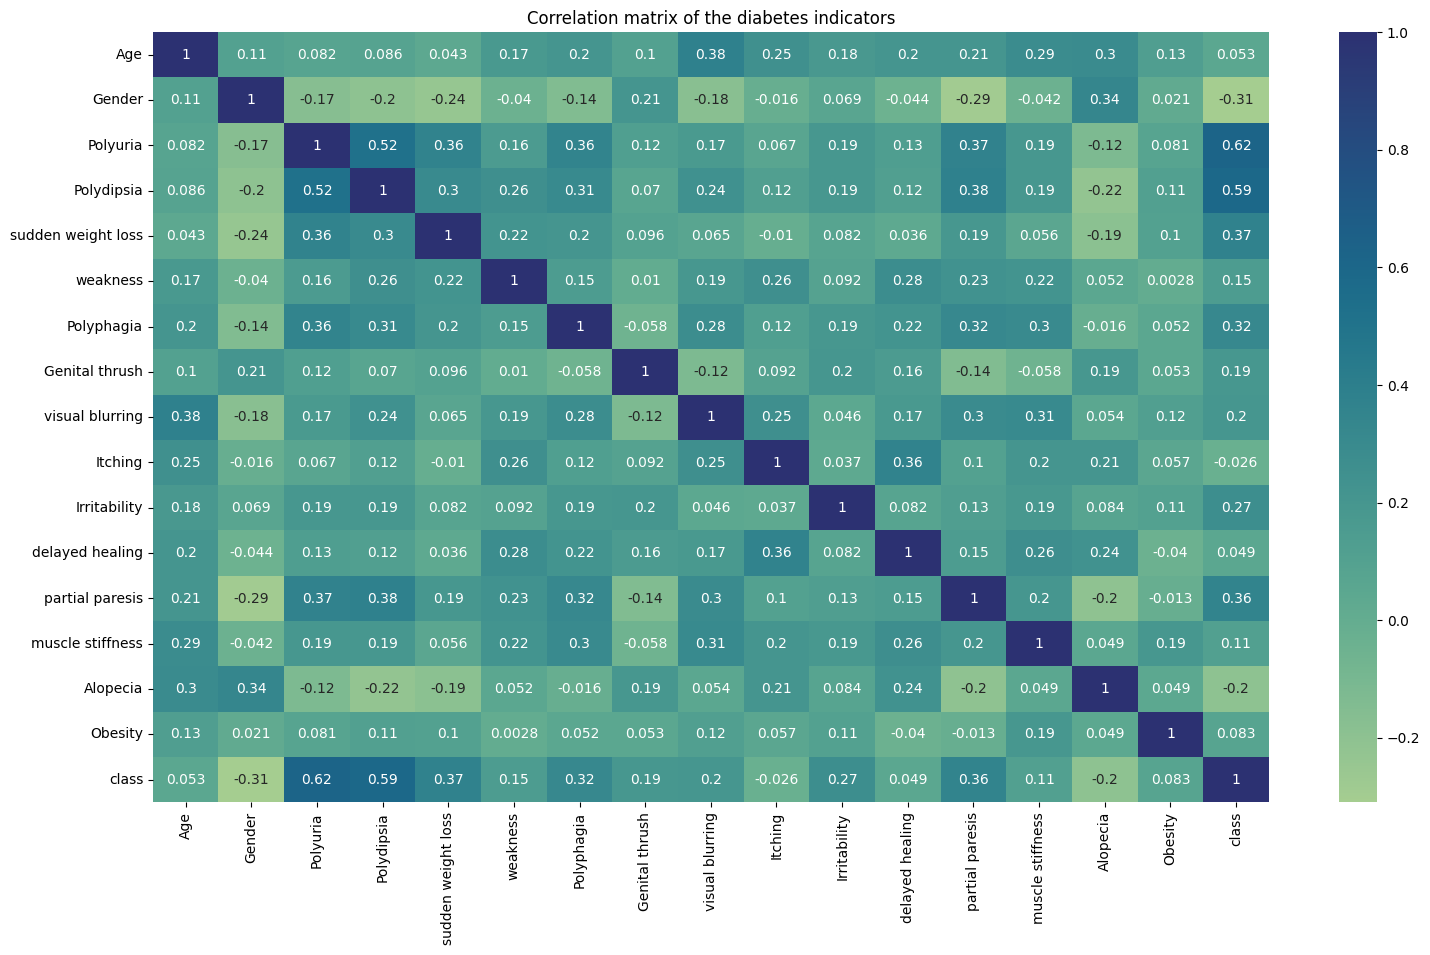

In [ ]:
# correlation matrix of the variables
corr_m = diabetes_data.corr()

# ploting the heatmap for the correlation
plt.figure(figsize=(18,10))          # Adjusting the plot size
sns.heatmap(corr_m,cmap='crest', annot=True)

plt.title("Correlation matrix of the diabetes indicators")
plt.show()

class    0   1
Gender        
0       11  80
1       67  93


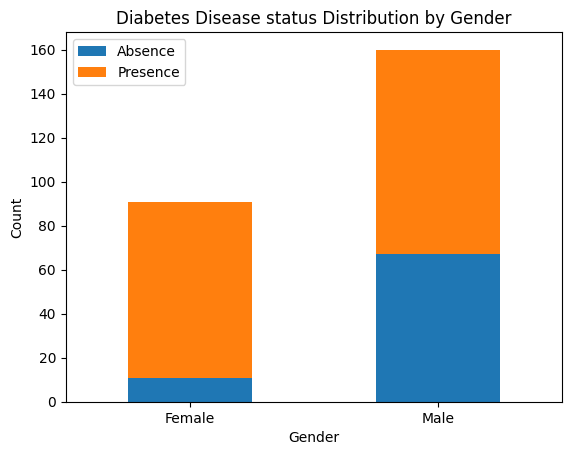

In [ ]:
# group the data by sex and status, and count the number of occurrences
grouped = diabetes_data.groupby(['Gender', 'class'])['class'].count().unstack()
print(grouped)

# map the labels to "Presence" and "Absence"
grouped.columns = ['Absence', 'Presence']
# plot a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True)
ax.set_xticklabels(['Female', 'Male'], rotation=0)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Diabetes Disease status Distribution by Gender')

# add the legend labels
handles, labels = ax.get_legend_handles_labels()
labels = ['Absence', 'Presence']
ax.legend(handles, labels)
plt.show()

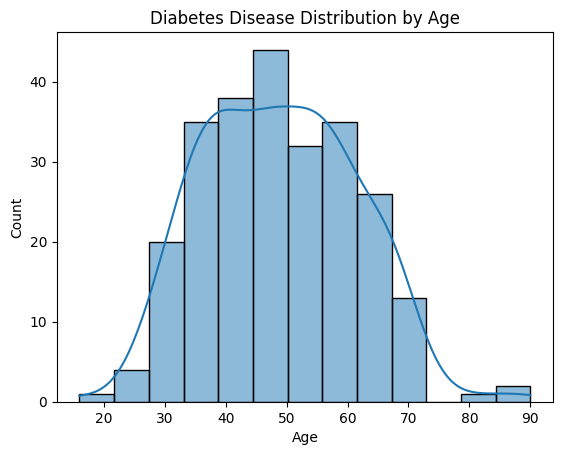

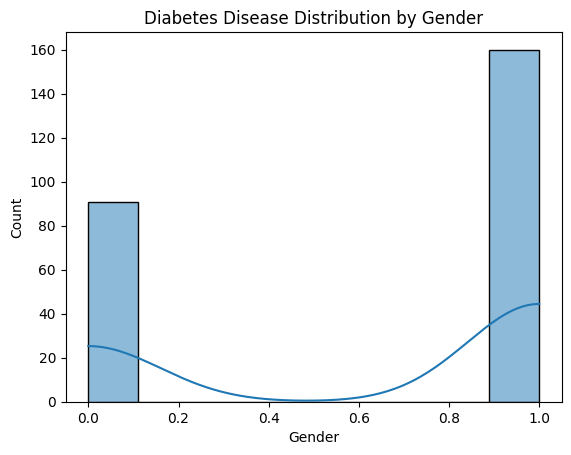

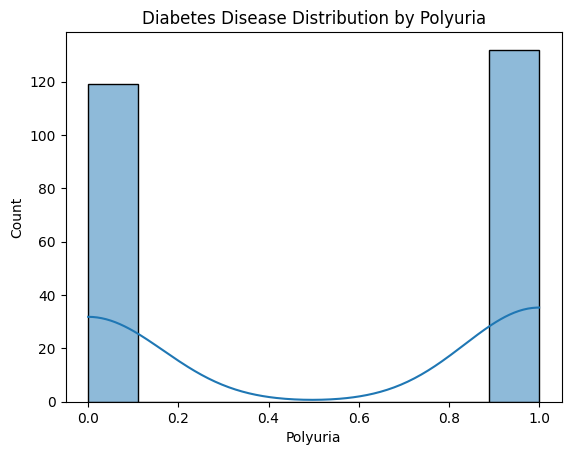

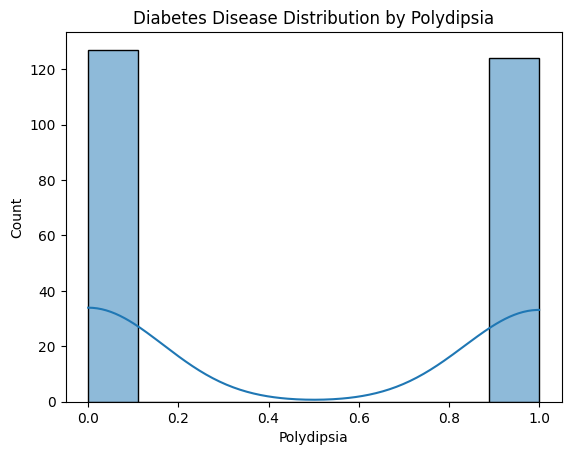

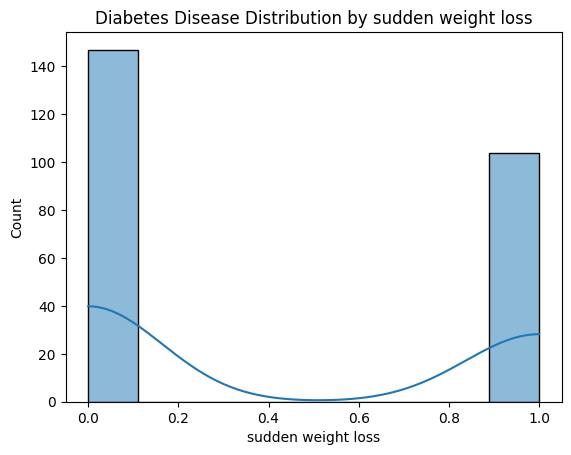

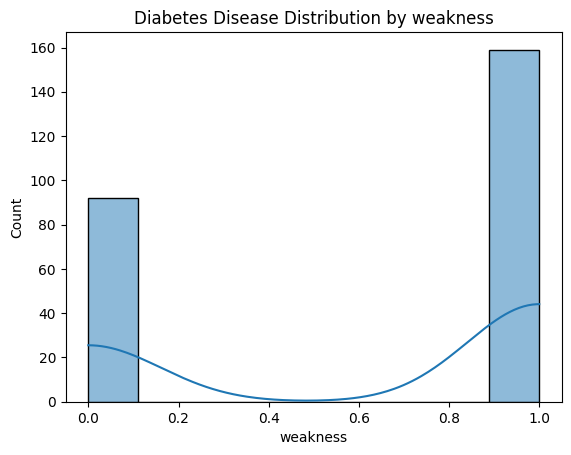

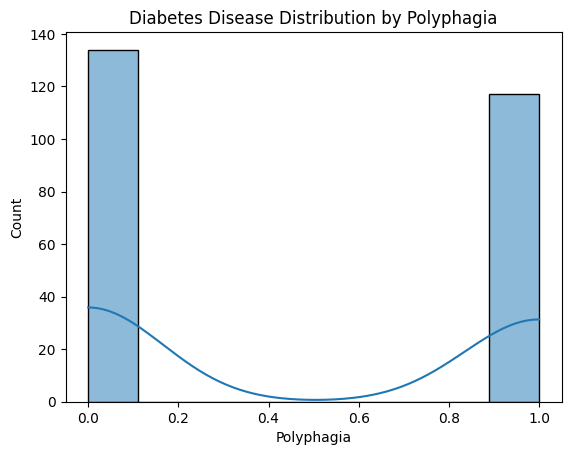

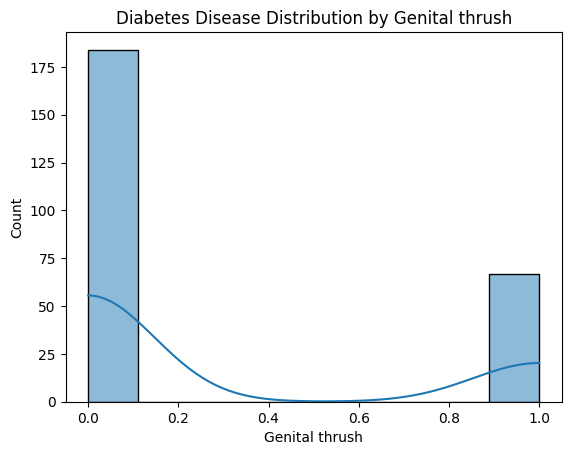

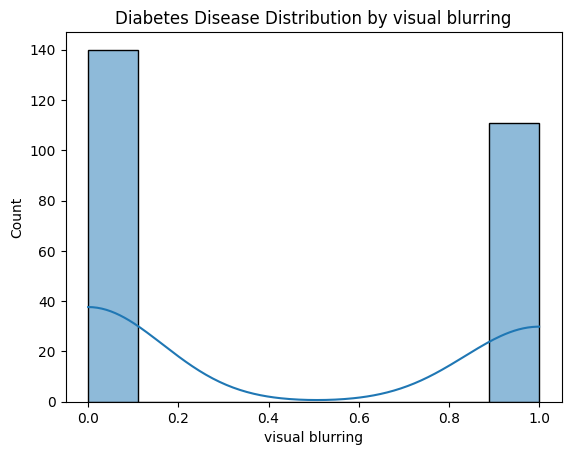

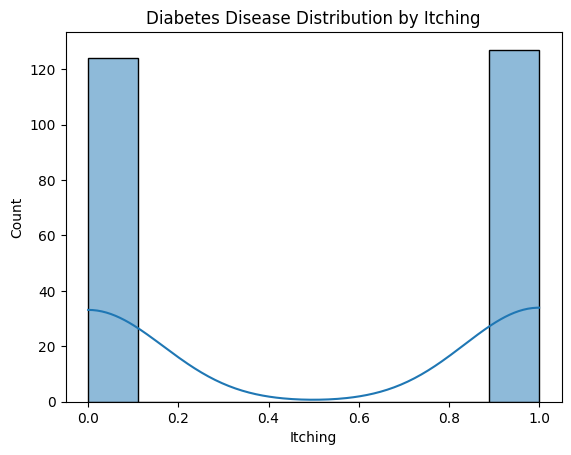

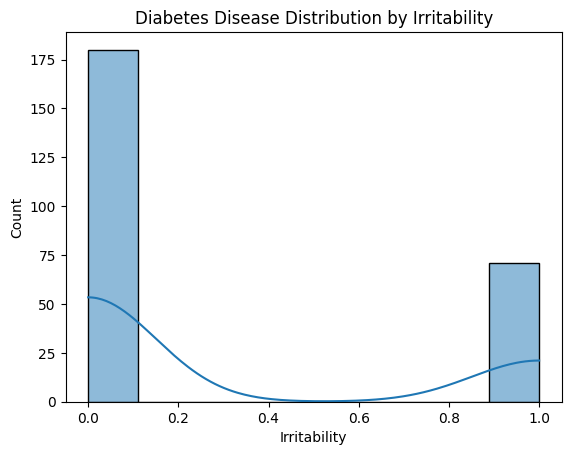

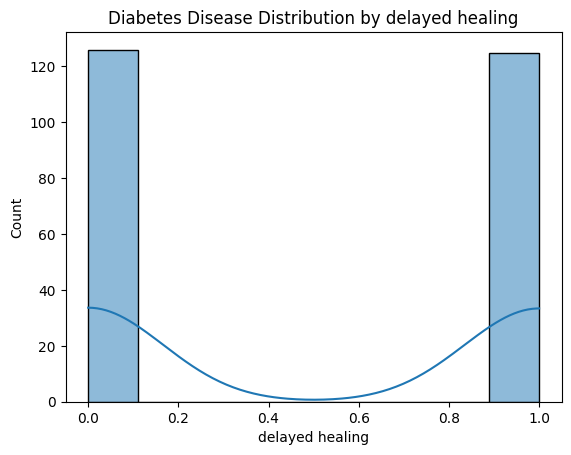

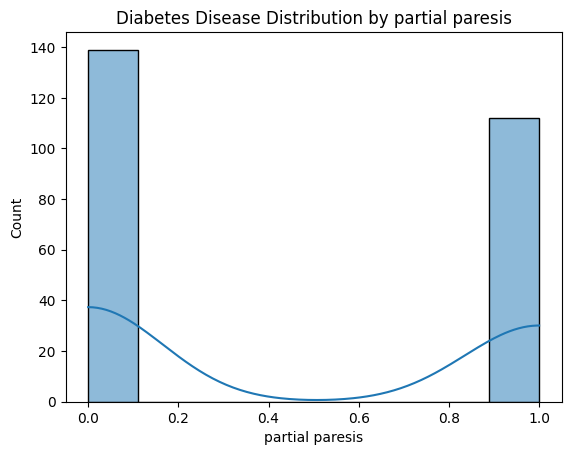

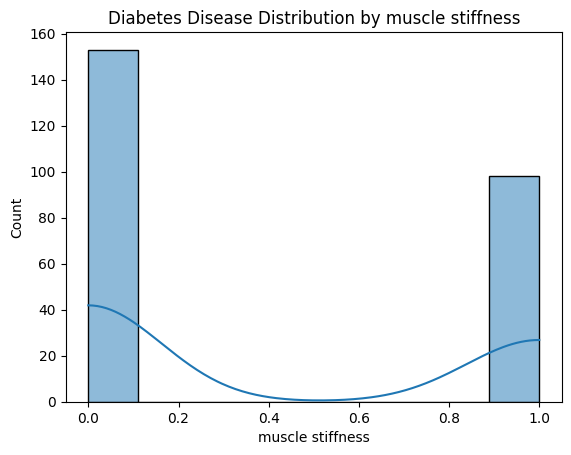

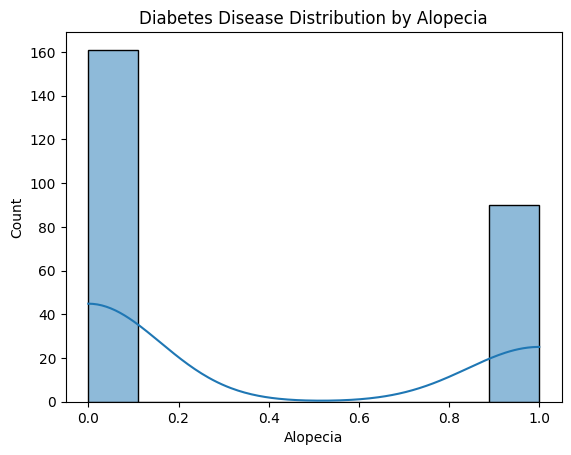

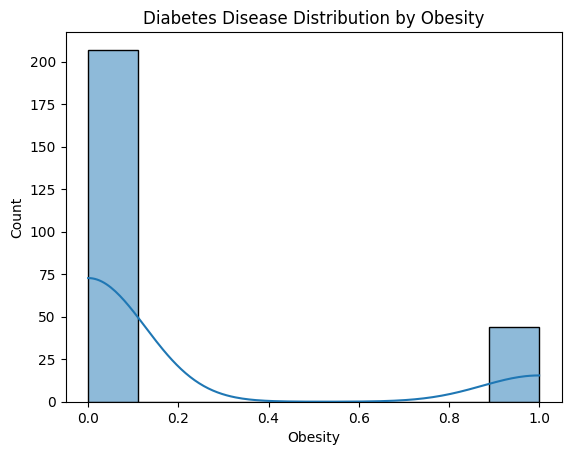

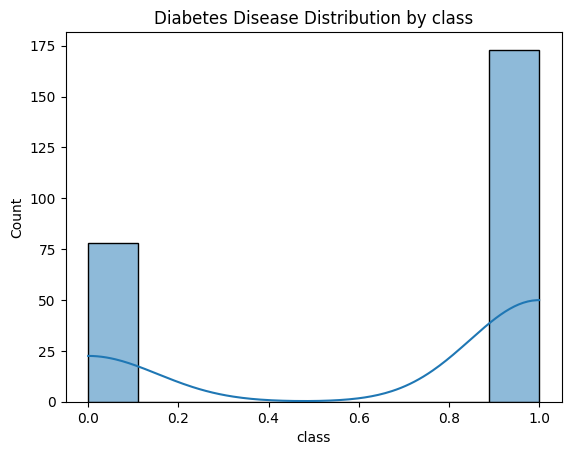

In [ ]:
# Create distribution plots for all variables using histogram
for column in diabetes_data:
    sns.histplot(data=diabetes_data, x=column, kde=True)
    plt.title("Diabetes Disease Distribution by "+column)
    plt.show()

Let's now do feature selection

In [ ]:
x = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

In [ ]:
# define the dependent and independent axis
selected_features=[]
# forward selection
def forward_regression(X, y, verbose=False):

    top_variable = []

    while True:
        changed=False
        least_significant = list(set(X.columns)-set(top_variable))
        new_pvalue = pd.Series(index=least_significant)
        for values in least_significant:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[top_variable+[values]]))).fit()
            new_pvalue[values] = model.pvalues[values]
        best_pvalue = new_pvalue.min()
        if best_pvalue < 0.05:
            best_variable = new_pvalue.idxmin()
            top_variable.append(best_variable)
            changed=True
            if True:
                print('Add {:20} with p-value {:.6}'.format(best_variable, best_pvalue))
                selected_features.append(best_variable)

        if not changed:
            break
    # print(model.summary())

forward_regression(x,y,verbose=True)

Add Polyuria             with p-value 3.69061e-28
Add Polydipsia           with p-value 3.21959e-11
Add Gender               with p-value 0.000203876
Add Genital thrush       with p-value 0.000302736
Add Irritability         with p-value 0.00675417
Add Itching              with p-value 0.00901926


In [ ]:
# Backward stepwise feature selection
def backward_regression(X, y,
                           threshold_out,
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    # print("P-values for each variable:")
    # print(model.pvalues[1:])
    return included

In [ ]:
backward_regression(x,y,0.05)

Drop Obesity                        with p-value 0.963177
Drop Alopecia                       with p-value 0.899439
Drop weakness                       with p-value 0.867592
Drop Age                            with p-value 0.628261
Drop muscle stiffness               with p-value 0.418026
Drop Polyphagia                     with p-value 0.3177
Drop partial paresis                with p-value 0.233939
Drop delayed healing                with p-value 0.233511
Drop visual blurring                with p-value 0.141504
Drop sudden weight loss             with p-value 0.132642


['Gender',
 'Polyuria',
 'Polydipsia',
 'Genital thrush',
 'Itching',
 'Irritability']

In [ ]:
new_set = diabetes_data[['Gender', 'Polyuria', 'Polydipsia', 'Genital thrush', 'Itching', 'Irritability', 'class']]
new_set = new_set.rename(columns={'Genital thrush': 'Genital_thrush'})
new_set

,Gender,Polyuria,Polydipsia,Genital_thrush,Itching,Irritability,class
0,1,0,1,0,1,0,1
1,1,0,0,0,0,0,1
2,1,1,0,0,1,0,1
3,1,0,0,1,1,0,1
4,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...
246,0,1,1,0,1,0,1
247,0,1,1,0,1,1,1
248,0,1,1,0,0,0,1
249,0,0,0,0,1,0,0


In [ ]:
# adjusting the x_train and x_test to be the selected features
X = new_set.iloc[:,:-1]
Y = new_set.iloc[:,-1]

In [ ]:
#Splitting training and testing sets
X_train,X_test,Y_train,Y_test=train_test_split(X, Y,test_size=0.2, random_state=42)

Random Forest

In [ ]:
# defining the search area
search_area={'n_estimators':[10,40,70,90,120],'max_depth':[2,3,5,10,20]}

# GridSearch
d_grid_search=GridSearchCV(estimator=RandomForestClassifier(), param_grid=search_area,cv=10, n_jobs=1,verbose=2,scoring='accuracy')
d_grid_search=d_grid_search.fit(X_train,X_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=40; total time=   0.5s
[CV] END .......................max_depth=2, n

In [ ]:
# the best estimator obtained by gridsearch
d_best_estimator= d_grid_search.best_estimator_
d_best_estimator

RandomForestClassifier(max_depth=5, n_estimators=90)

In [ ]:
# Fit the best retrieved parameters into a random forest model
d_randomf = RandomForestClassifier(n_estimators=90 , max_depth=5,random_state=42)
d_randomf.fit(X_train,Y_train)   # fiting the model using training set

# predictions
d_y_pred = d_randomf.predict(X_test)
d_y_pred

# Calculating the accuracy of the model
d_accuracy = accuracy_score(Y_test, d_y_pred)
print("Accuracy:", d_accuracy)

# Calculating the precision score  of the model
precision = precision_score(Y_test, d_y_pred)
print("Precision:", precision)

# Calculating the recall score  of the model
recall = recall_score(Y_test, d_y_pred)
print("Recall:", recall)

#  Calculating the f1_score of the model
f1 = f1_score(Y_test, d_y_pred)
print("F1 Score:", f1)

Accuracy: 0.8823529411764706
Precision: 0.8717948717948718
Recall: 0.9714285714285714
F1 Score: 0.9189189189189189


Support vector machine

In [ ]:
# Creating an SVM model
# d_svm_model = SVC(kernel='rbf', C=1)
d_svm_model = SVC(kernel='linear', C=1)

# Training the model on the training set
d_svm_model.fit(X_train, Y_train)

import pickle

with open('dbs_svm_model.pkl', 'wb') as f:
    pickle.dump(d_svm_model, f)

# Making predictions on the testing set
s_y_predicted = d_svm_model.predict(X_test)
s_y_predicted

# Calculating the accuracy of the model
s_accuracy = accuracy_score(Y_test, s_y_predicted)
print("Accuracy:", s_accuracy)

# Calculating the precision score  of the model
precision = precision_score(Y_test, s_y_predicted)
print("Precision:", precision)

# Calculating the recall score  of the model
recall = recall_score(Y_test, s_y_predicted)
print("Recall:", recall)

#  Calculating the f1_score of the model
f1 = f1_score(Y_test, s_y_predicted)
print("F1 Score:", f1)

Accuracy: 0.8823529411764706
Precision: 0.8717948717948718
Recall: 0.9714285714285714
F1 Score: 0.9189189189189189


ANN

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cnnX_train = sc.fit_transform(X_train)
cnnX_test = sc.transform(X_test)

import pickle
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Dropout

classifier = Sequential()

#adding the first hidden layer
classifier.add(Dense(32,activation='relu',input_dim=cnnX_train.shape[1]))
classifier.add(Dropout(0.5))

#adding the second hidden layer
classifier.add(Dense(16,activation='relu'))
classifier.add(Dropout(0.5))

#adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

classifier.fit(cnnX_train, Y_train, batch_size=35, epochs=60)

cnny_pred = classifier.predict(cnnX_test)
cnny_pred = (cnny_pred > 0.5)

# Making predictions on the testing set
# ypredicted = (model.predict(x_test) > 0.5).astype("int32")


# Evaluating the model on the testing set
accuracy = accuracy_score(Y_test, cnny_pred)
print("The Accuracy:", accuracy)

# Calculating performance metrics
precision = precision_score(Y_test, cnny_pred)
recall = recall_score(Y_test, cnny_pred)
f1 = f1_score(Y_test, cnny_pred)

# Printing the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)




# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(Y_test, cnny_pred)
# print(cm)

Epoch 1/60
6/6 [==============================] - 1s 4ms/step - loss: 0.7753 - accuracy: 0.5400
Epoch 2/60
6/6 [==============================] - 0s 4ms/step - loss: 0.8056 - accuracy: 0.5100
Epoch 3/60
6/6 [==============================] - 0s 4ms/step - loss: 0.7064 - accuracy: 0.5200
Epoch 4/60
6/6 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5900
Epoch 5/60
6/6 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5600
Epoch 6/60
6/6 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.6700
Epoch 7/60
6/6 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6750
Epoch 8/60
6/6 [==============================] - 0s 4ms/step - loss: 0.5724 - accuracy: 0.7100
Epoch 9/60
6/6 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.7100
Epoch 10/60
6/6 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.7500
Epoch 11/60
6/6 [======================

Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Creating an NB model
nb_model = GaussianNB()

# Training the model on the training set
nb_model.fit(X_train, Y_train)

# Making predictions on the testing set
ny_predicted = nb_model.predict(X_test)
ny_predicted

# Calculating the accuracy of the model
accuracy3 = accuracy_score(Y_test, ny_predicted)
print("Accuracy of nb model :", accuracy3)

# Calculating the precision score  of the model
precision = precision_score(Y_test, ny_predicted)
print("Precision:", precision)

# Calculating the recall score  of the model
recall = recall_score(Y_test, ny_predicted)
print("Recall:", recall)

#  Calculating the f1_score of the model
f1 = f1_score(Y_test, ny_predicted)
print("F1 Score:", f1)

Accuracy of nb model : 0.8627450980392157
Precision: 0.9375
Recall: 0.8571428571428571
F1 Score: 0.8955223880597014
